In [268]:
import ipynb
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
from statistics import mean

from sklearn import tree
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn import datasets, ensemble, model_selection
from sklearn.ensemble import RandomForestClassifier

import pickle
import graphviz 

In [269]:
import warnings
warnings.filterwarnings('ignore')

In [270]:
df = pd.read_csv("data/BEST_heart.csv", index_col=0)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [271]:
# Reseting the index
df.reset_index(drop=True, inplace=True)

target = "target"

y = df[target]
X = df.drop(columns=[target])
features = X.columns

# Convert categorical feature types
categorical_features = ['sex', 'cp','fbs','restecg','exang','slope','ca','thal']
df[categorical_features] = df[categorical_features].astype('category') 
df[target] = df[target].astype('category') 

X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,55,1,0,132,353,0,1,132,1,1.2,1,1,3
1,58,1,0,146,218,0,1,105,0,2.0,1,1,3
2,47,1,0,110,275,0,0,118,1,1.0,1,1,2
3,52,1,0,128,255,0,1,161,1,0.0,2,1,3
4,59,1,3,160,273,0,0,125,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,56,1,1,120,240,0,1,169,0,0.0,0,0,2
326,55,0,1,132,342,0,1,166,0,1.2,2,0,2
327,41,1,1,120,157,0,1,182,0,0.0,2,0,2
328,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [272]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
1,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
2,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
3,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
4,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
326,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
327,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
328,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


# Training

Get Parameters from "ParameterTuning"

In [295]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=2, min_samples_split=3)

In [448]:
def returnModel(model, df, target):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
        
    m = model.fit(X_train, y_train)
    y_pred = m.predict(X_test)
        
    f= f1_score(y_test, y_pred, average='weighted')
    a= accuracy_score(y_test, y_pred)
    
    return [m, f, a, X_test, y_test, y_pred]

In [451]:
f1 = 0
while f1 < 0.90:
    [model, f1, accuracy, X_test, y_test, y_pred] = returnModel(dt_model, df, target)
    
print("F1-score: "+str(f1)+" Accuracy: "+str(accuracy))

F1-score: 0.9292496259935271 Accuracy: 0.9292929292929293


In [453]:
data = {'f1_scores': f1, 'accuracy': accuracy, 'y_test': y_test, 'y_pred': y_pred}  
Xs = X_test
  
# Create DataFrame  
output_df = pd.DataFrame(data).join(Xs)

output_df.to_csv("results/bestModelStats.csv")

output_df

,f1_scores,accuracy,y_test,y_pred,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
104,0.92925,0.929293,0,0,57,1,2,128,229,0,0,150,0,0.4,1,1,3
152,0.92925,0.929293,0,0,57,1,2,128,229,0,0,150,0,0.4,1,1,3
113,0.92925,0.929293,0,0,54,1,0,122,286,0,0,116,1,3.2,1,2,2
258,0.92925,0.929293,1,1,54,0,1,132,288,1,0,159,1,0.0,2,1,2
102,0.92925,0.929293,0,0,60,0,0,150,258,0,0,157,0,2.6,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,0.92925,0.929293,0,0,52,1,0,112,230,0,1,160,0,0.0,2,1,2
283,0.92925,0.929293,1,1,46,0,1,105,204,0,1,172,0,0.0,2,0,2
50,0.92925,0.929293,0,1,35,1,0,126,282,0,0,156,1,0.0,2,0,3
299,0.92925,0.929293,1,1,41,0,1,126,306,0,1,163,0,0.0,2,0,2


In [462]:
# Exporting Model

with open('results/DecisionTreeModel','wb') as outfile:
    pickle.dump(model, outfile)

# Importing Existing Model

#with open('results/DecisionTreeModel','rb') as inputfile:
#    model = pickle.load(inputfile) 

# Feature Importance

https://towardsdatascience.com/explainable-ai-xai-with-a-decision-tree-960d60b240bd

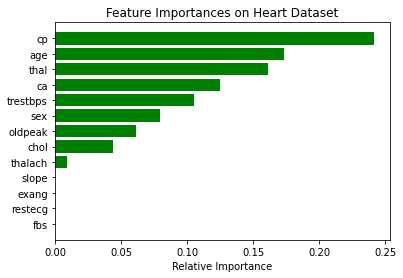

In [454]:
importances = model.feature_importances_
indices = np.argsort(importances)
j = len(features)

plt.title('Feature Importances on Heart Dataset')
plt.barh(range(j), importances[indices][len(indices)-j:], color='g', align='center')
plt.yticks(range(j), [features[i] for i in indices[len(indices)-j:]])
plt.xlabel('Relative Importance')
plt.savefig("results/ImportanceGraph.png")
plt.show()

In [455]:
print(features)
print(model.feature_importances_)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
[0.17332147 0.07981823 0.24129706 0.10522638 0.04369219 0.
 0.         0.00921131 0.         0.06149761 0.         0.12492481
 0.16101093]


# Visualization

https://towardsdatascience.com/explainable-ai-xai-with-a-decision-tree-960d60b240bd

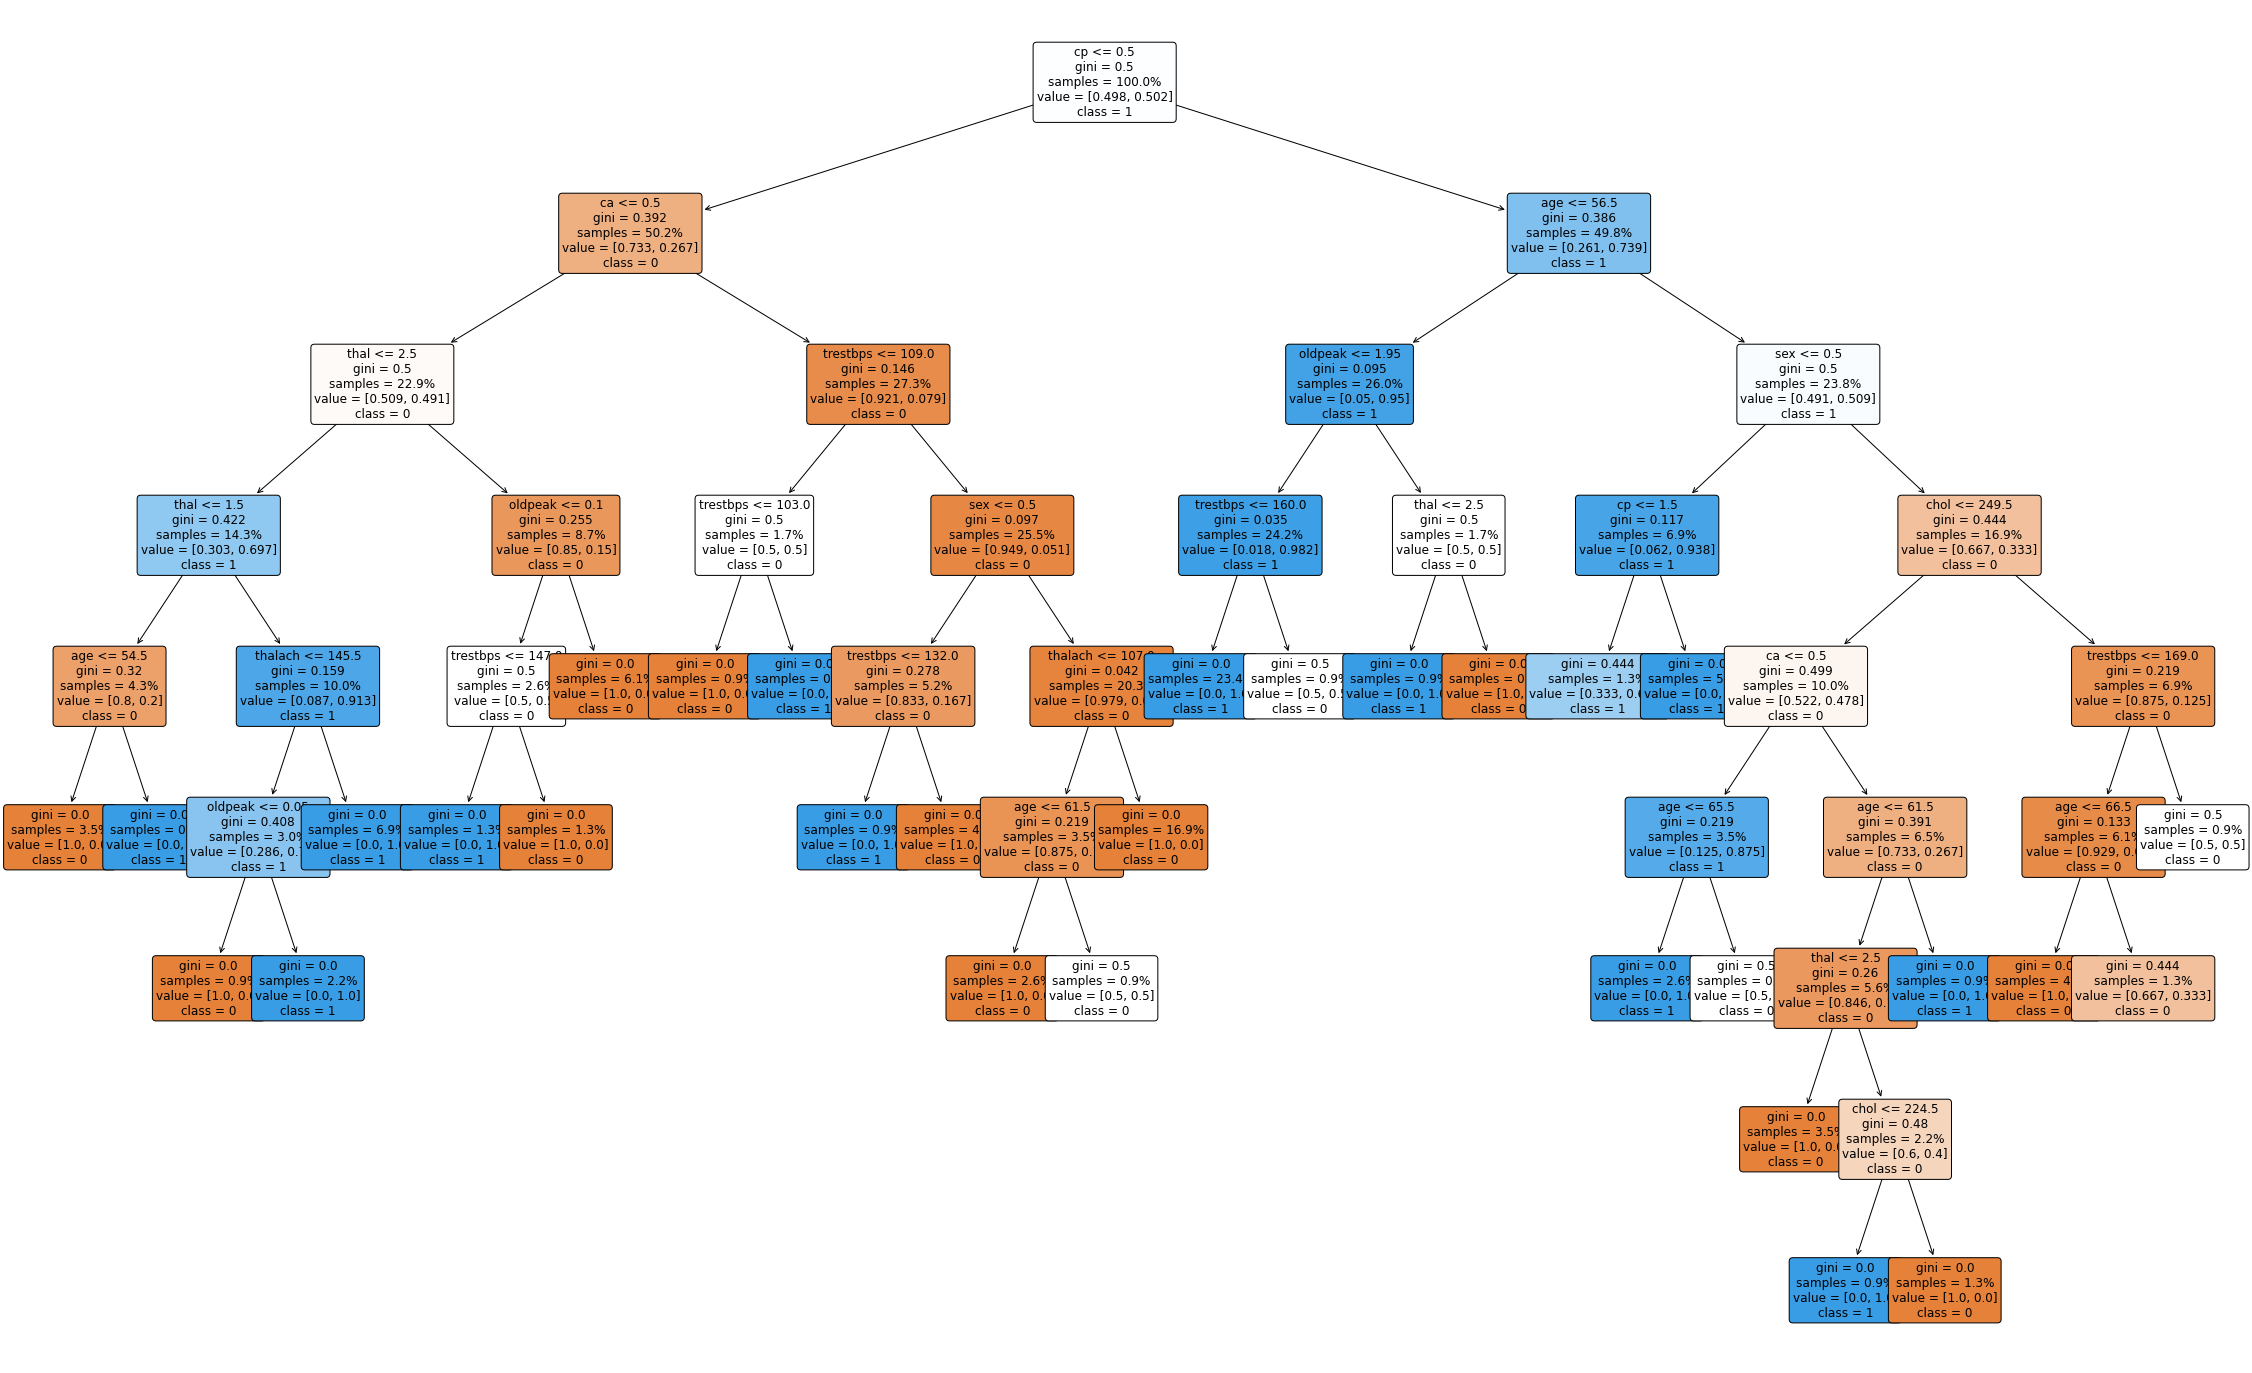

In [456]:
fig = plt.figure(figsize=(40,25))
vis = tree.plot_tree(model, feature_names = features, class_names = ['0', '1'], fontsize=12, proportion=True, filled=True, rounded=True)
fig.savefig('results/DecisionTree_Proportions.png')

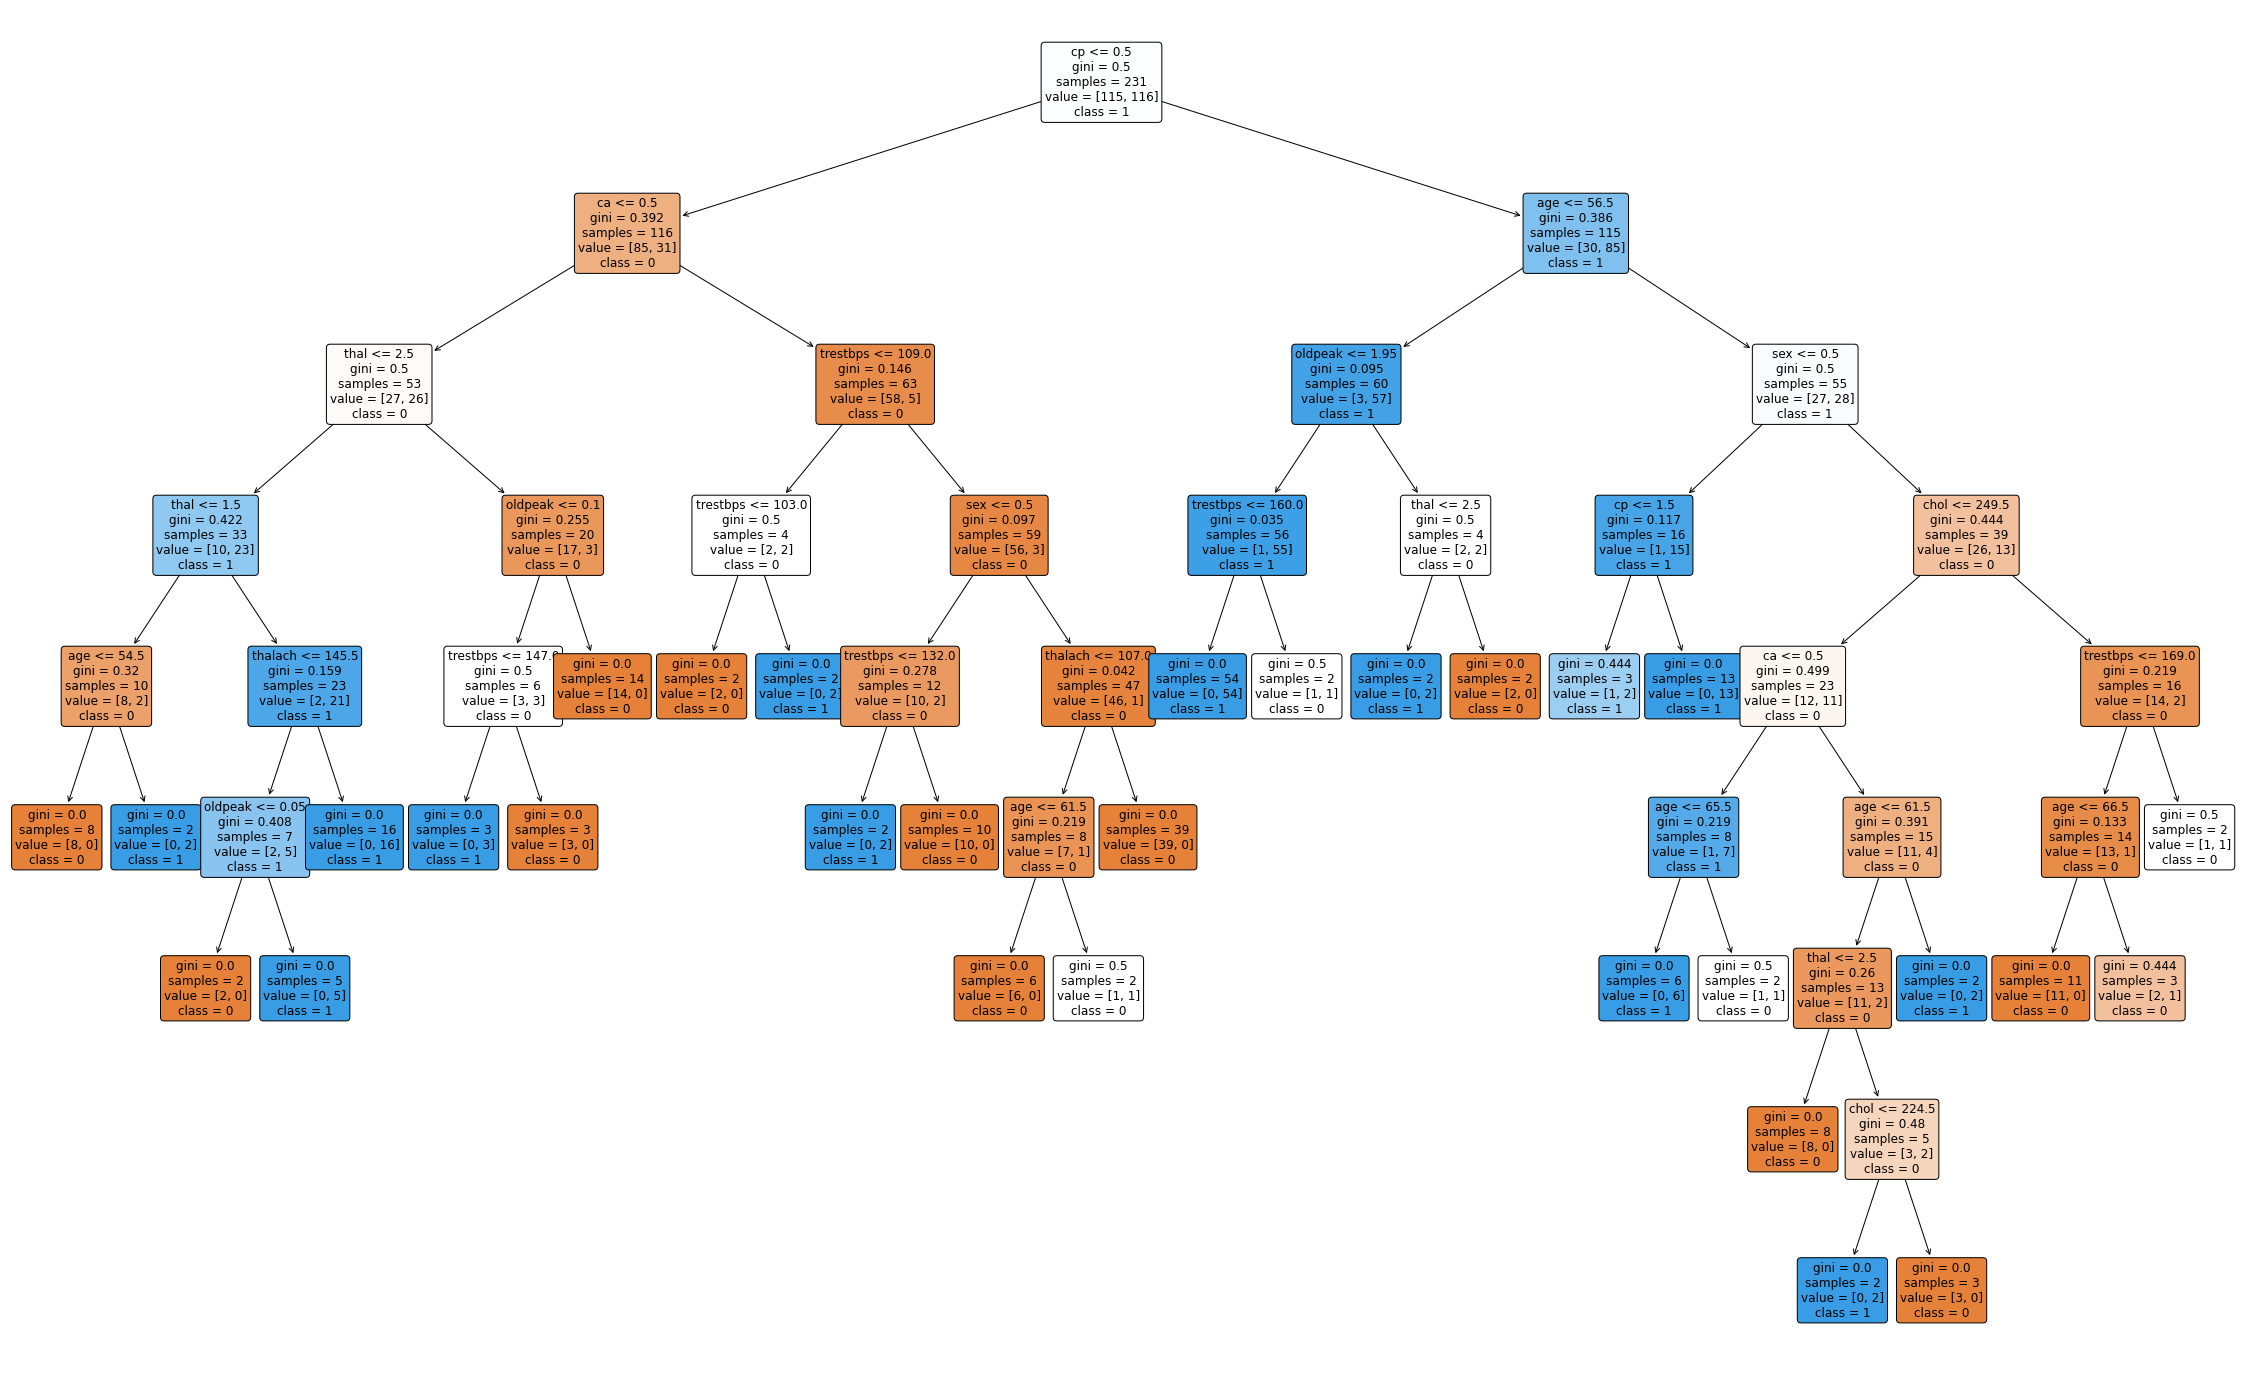

In [457]:
# visualization
fig = plt.figure(figsize=(40,25))
vis = tree.plot_tree(model, feature_names = features, class_names = ['0', '1'], fontsize=12, filled=True, rounded=True)
fig.savefig('results/DecisionTree.png')

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html

In [458]:
print(features)
r = export_text(model, feature_names=features.tolist())
print(r)

f = open("results/DecisionTreeText.txt", "w")
print(r, file=f)
f.close()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- thal <= 2.50
|   |   |   |--- thal <= 1.50
|   |   |   |   |--- age <= 54.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  54.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- thal >  1.50
|   |   |   |   |--- thalach <= 145.50
|   |   |   |   |   |--- oldpeak <= 0.05
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- oldpeak >  0.05
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- thalach >  145.50
|   |   |   |   |   |--- class: 1
|   |   |--- thal >  2.50
|   |   |   |--- oldpeak <= 0.10
|   |   |   |   |--- trestbps <= 147.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- trestbps >  147.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- oldpeak >  0.10
|   |   |   |   |--- class: 0
|   |--- ca >  0.50
|   |   |--- trestbps <= 109.00
|

https://scikit-learn.org/stable/modules/tree.html#classification

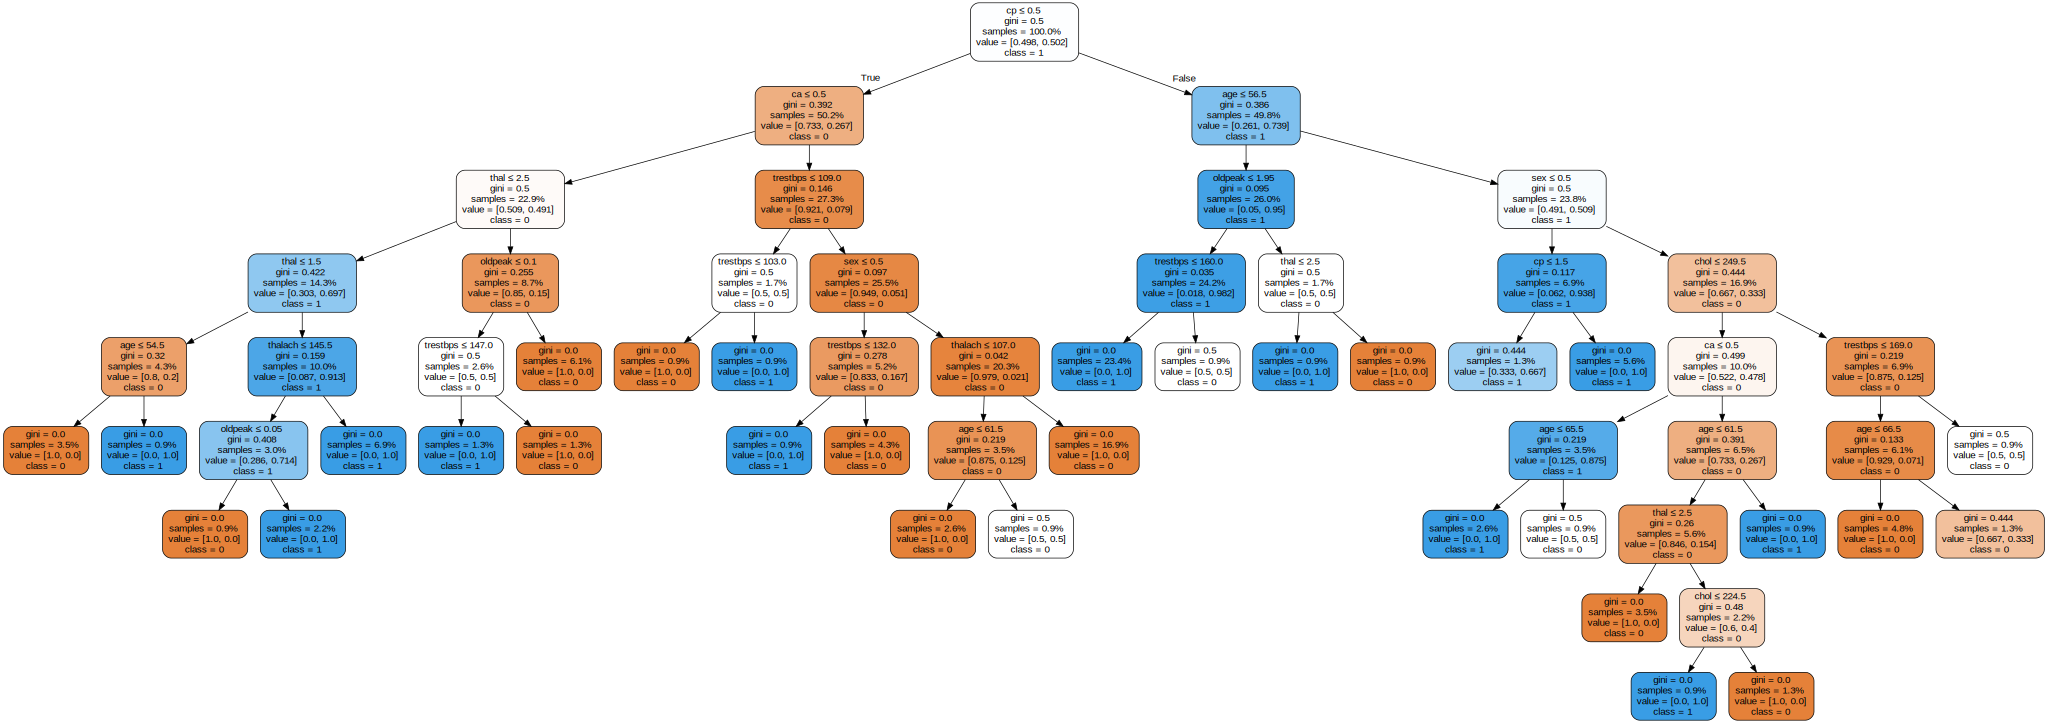

In [463]:
dot_data = tree.export_graphviz(model, out_file=None, feature_names=features,  
                                class_names = ['0', '1'], filled=True, rounded=True, special_characters=True, proportion=True)  
graph = graphviz.Source(dot_data)  
#graph.render(filename='Graphviz')

graph

# Confusion Matrix

In [464]:
def saveBestConfusionMatrix(y1, y2):
    # Confusion Matrix
    cf_matrix = (confusion_matrix(y1, y2))

    ax= plt.subplot()
    sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Decision Tree Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['False', 'True']);

    plt.savefig("results\ConfusionMatrix.png")

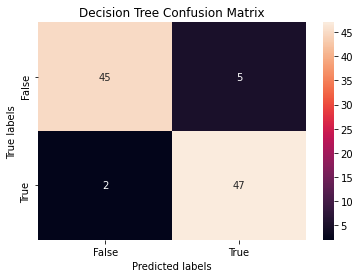

In [465]:
saveBestConfusionMatrix(y_test, y_pred)

In [469]:
string = []

for row in output_df:
    string = output_df[column=0]

SyntaxError: invalid syntax (<ipython-input-469-321c270f9181>, line 4)

# Morgue

# Decision Boundaries

https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

In [133]:
# Feature Pairs
features_combinations = []

for mod1 in features:
    for mod2 in features:
        if mod1 != mod2 and not ((mod2,mod1) in features_combinations):
            features_combinations.append([mod1,mod2])
            
print(features_combinations)
print(len(features_combinations))

[['trestbps', 'chol'], ['trestbps', 'thalach'], ['trestbps', 'oldpeak'], ['trestbps', 'sex'], ['trestbps', 'cp'], ['trestbps', 'fbs'], ['trestbps', 'restecg'], ['trestbps', 'exang'], ['trestbps', 'slope'], ['trestbps', 'ca'], ['trestbps', 'thal'], ['trestbps', 'age'], ['chol', 'trestbps'], ['chol', 'thalach'], ['chol', 'oldpeak'], ['chol', 'sex'], ['chol', 'cp'], ['chol', 'fbs'], ['chol', 'restecg'], ['chol', 'exang'], ['chol', 'slope'], ['chol', 'ca'], ['chol', 'thal'], ['chol', 'age'], ['thalach', 'trestbps'], ['thalach', 'chol'], ['thalach', 'oldpeak'], ['thalach', 'sex'], ['thalach', 'cp'], ['thalach', 'fbs'], ['thalach', 'restecg'], ['thalach', 'exang'], ['thalach', 'slope'], ['thalach', 'ca'], ['thalach', 'thal'], ['thalach', 'age'], ['oldpeak', 'trestbps'], ['oldpeak', 'chol'], ['oldpeak', 'thalach'], ['oldpeak', 'sex'], ['oldpeak', 'cp'], ['oldpeak', 'fbs'], ['oldpeak', 'restecg'], ['oldpeak', 'exang'], ['oldpeak', 'slope'], ['oldpeak', 'ca'], ['oldpeak', 'thal'], ['oldpeak', '

In [134]:
def DecisionBoundary(pair):
    
    # Parameters
    n_classes = 2
    plot_colors = "ryb"
    plot_step = 0.5
    pairidx = 0

    # We only take the two corresponding features
    X = df[pair].to_numpy()
    y = df.target.to_numpy()

    # Train
    clf = dt_model.fit(X, y)

    # Plot the decision boundary
    plt.subplot(1, 1, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.suptitle("Decision surface of a decision tree using paired features")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.savefig('results/decisionBoundaries/DecisionBoundary_'+pair[0]+'_'+pair[1]+'.png')

In [ ]:
for feat in features_combinations:
    DecisionBoundary(feat)